# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | saipan
Processing Record 3 of Set 1 | bandarbeyla
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | muroto-misakicho
Processing Record 7 of Set 1 | port augusta
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | togur
Processing Record 14 of Set 1 | maisi
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | oakdale
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | ashtabula
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | albany
Processing Record 22 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,13.39,91,100,2.41,SH,1693148362
1,saipan,15.1355,145.7010,27.39,89,75,4.12,MP,1693148362
2,bandarbeyla,9.4942,50.8122,25.70,80,75,14.19,SO,1693148362
3,adamstown,-25.0660,-130.1015,19.71,66,67,4.15,PN,1693148226
4,port-aux-francais,-49.3500,70.2167,6.56,96,100,19.11,TF,1693148362


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,13.39,91,100,2.41,SH,1693148362
1,saipan,15.1355,145.7010,27.39,89,75,4.12,MP,1693148362
2,bandarbeyla,9.4942,50.8122,25.70,80,75,14.19,SO,1693148362
3,adamstown,-25.0660,-130.1015,19.71,66,67,4.15,PN,1693148226
4,port-aux-francais,-49.3500,70.2167,6.56,96,100,19.11,TF,1693148362


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

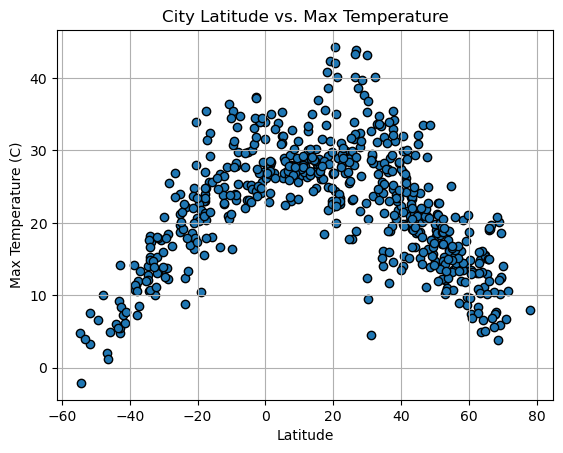

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

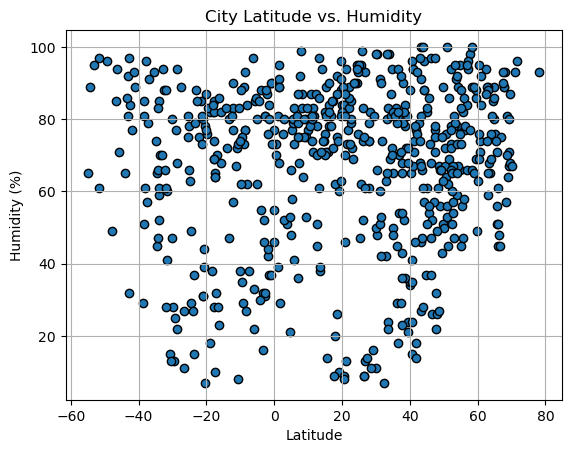

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

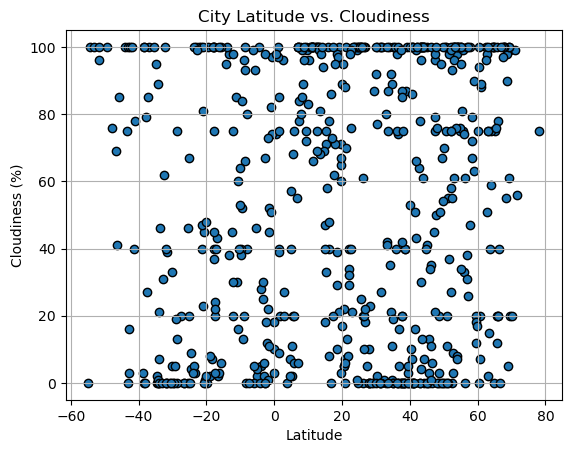

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

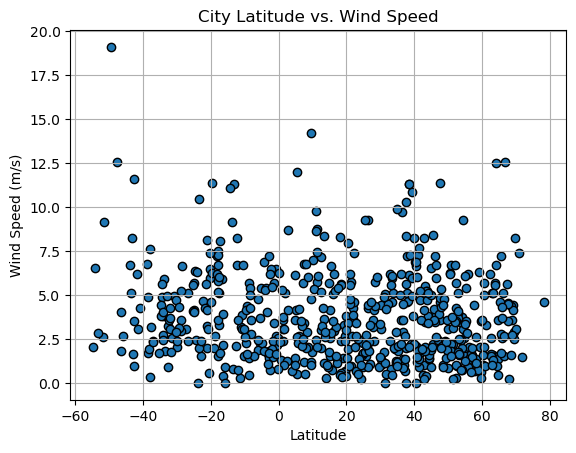

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(main_df, xcolumn_str, ycolumn_str):

    x_values = main_df[xcolumn_str]
    y_values = main_df[ycolumn_str]
    # Build the scatter plots for latitude vs. wind speed
    plt.scatter(x_values, y_values, marker='o')

    # Incorporate the other graph properties
    plt.title(f"{xcolumn_str} vs. {ycolumn_str}")
    plt.ylabel(ycolumn_str)
    plt.xlabel(xcolumn_str)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    x = x_values.min()
    y = y_values.min()
    plt.annotate(line_eq,(x, y),fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

    return

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saipan,15.1355,145.7010,27.39,89,75,4.12,MP,1693148362
2,bandarbeyla,9.4942,50.8122,25.70,80,75,14.19,SO,1693148362
5,muroto-misakicho,33.2833,134.1500,26.74,80,42,0.79,JP,1693148362
11,ribeira grande,38.5167,-28.7000,24.32,78,40,11.32,PT,1693148363
12,togur,58.3631,82.8265,13.47,89,67,2.60,RU,1693148363


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,13.39,91,100,2.41,SH,1693148362
3,adamstown,-25.0660,-130.1015,19.71,66,67,4.15,PN,1693148226
4,port-aux-francais,-49.3500,70.2167,6.56,96,100,19.11,TF,1693148362
6,port augusta,-32.5000,137.7667,9.97,88,62,3.22,AU,1693148362
7,grytviken,-54.2811,-36.5092,-2.12,89,100,6.52,GS,1693148363


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5027970082851643


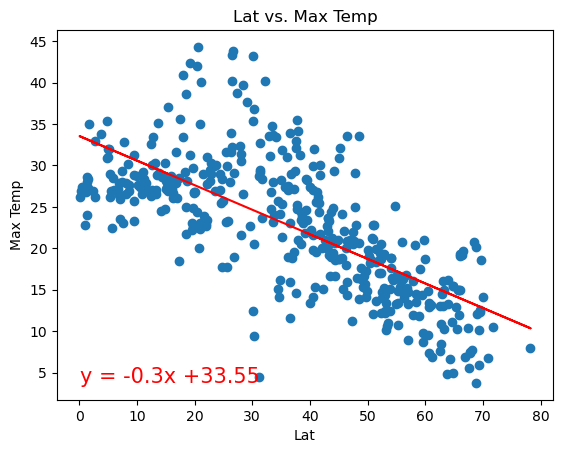

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Max Temp")

The r-value is: 0.7454214653886702


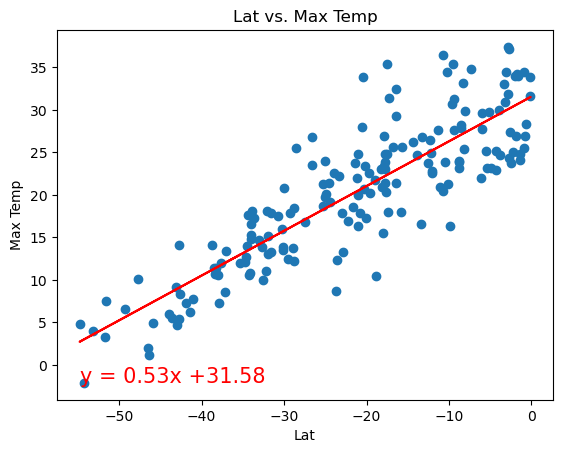

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Max Temp")

**Discussion about the linear relationship:** The Latitude and Max Temperature has direct correlation as shown by the graphs above for the Northern and Southern Hemisphere. The Northern Hemisphere shows a moderate negative correlation. While the Southern Hemisphere shows a strong positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.001590824219227773


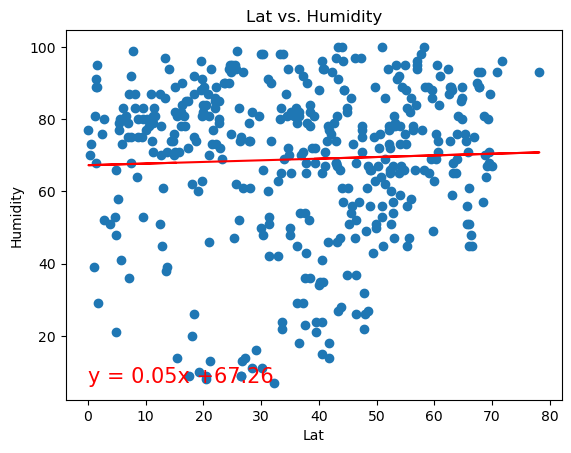

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Humidity")

The r-value is: 0.020167691098250593


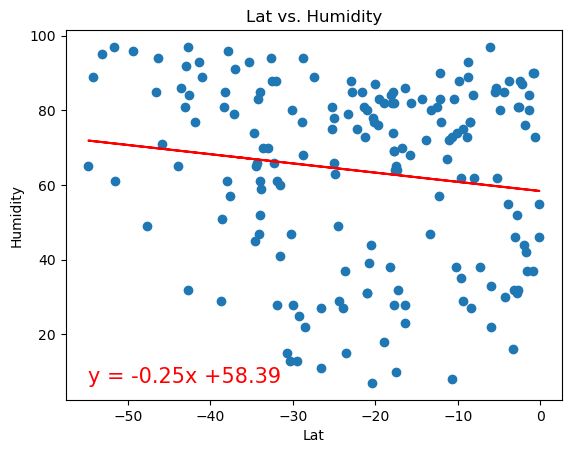

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Humidity")

**Discussion about the linear relationship:** The Latitude and Max Temperature does not have any correlation to each other as can be seen by an almost straight horizontal linear regression line.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 4.23304272221641e-06


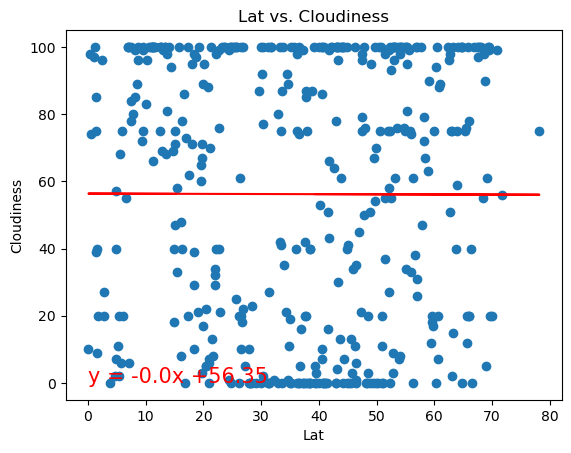

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Cloudiness")

The r-value is: 0.009030188136313153


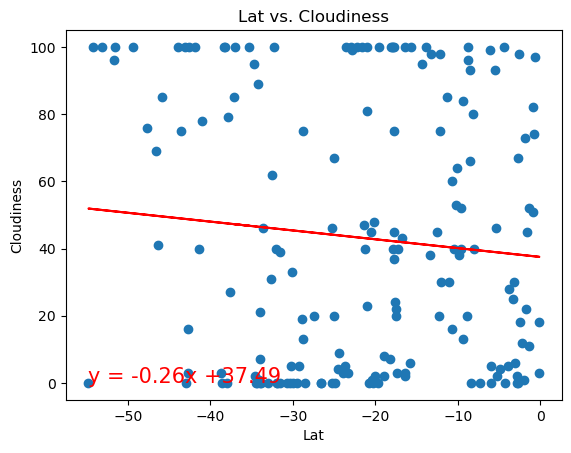

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Cloudiness")

**Discussion about the linear relationship:** The Latitude and Cloudiness does not have any correlation to each other as can be seen by an almost straight horizontal linear regression line, for both the Northern and Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0009888604348686951


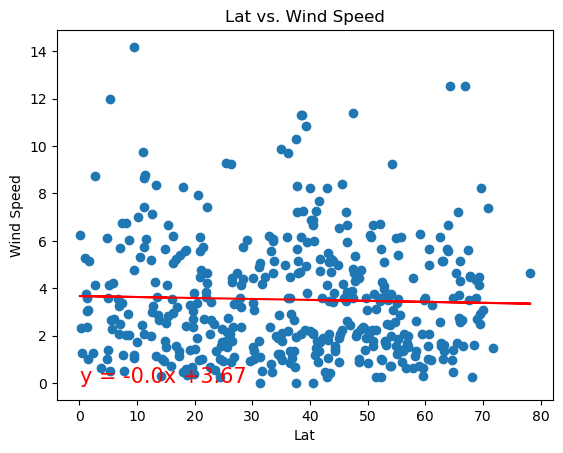

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, "Lat", "Wind Speed")

The r-value is: 0.027697654766582907


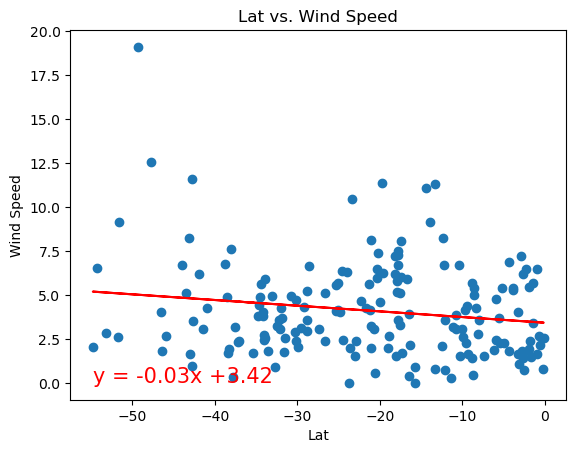

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, "Lat", "Wind Speed")

**Discussion about the linear relationship:** The Latitude and Wind Speed does not have any correlation to each other as can be seen by an almost straight horizontal linear regression line, for both the Northern and Southern Hemisphere.